In [52]:
# from qiskit import *
from qiskit.primitives import Estimator

from qiskit.quantum_info.operators import SparsePauliOp
from qiskit.quantum_info.operators import Pauli
from qiskit.quantum_info import Operator
from qiskit_nature.second_q.hamiltonians import FermiHubbardModel
from qiskit_nature.second_q.hamiltonians.lattices.lattice import Lattice
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import ParityMapper

import numpy as np
from functools import *
import scipy.linalg as LA

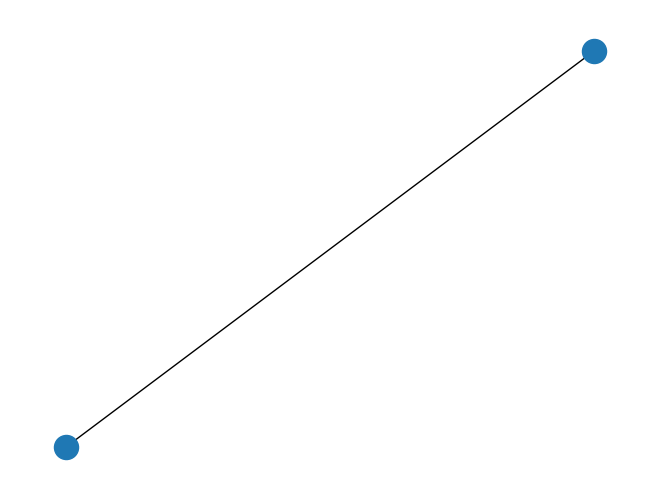

In [54]:
# nodes = 6
# edges = [(0,1,-1),(0,2,-1),(0,3,-1),(0,4,-1),
#          (5,1,-1),(5,2,-1),(5,3,-1),(5,4,-1),
#          (1,2,-1),(2,3,-1),(3,4,-1),(4,1,-1)]
# adjacency_matrix = np.array([
#     [0., -1., -1., -1., -1., 0.],
#     [-1., 0., -1., 0., -1., -1.],
#     [-1., -1., 0., -1., 0., -1.],
#     [-1., 0., -1., 0., -1., -1.],
#     [-1., -1., 0., -1., 0., -1.],
#     [0., -1., -1., -1., -1., 0.]])
nodes = 2
edges = [(0,1,-1), (0,1,-1)]

octahedron = Lattice.from_nodes_and_edges(nodes, edges)
fermi_hubb = FermiHubbardModel(octahedron, 1)
hamiltonian = ParityMapper().map(fermi_hubb.second_q_op())
octahedron.draw()

In [55]:
print("Dims in hamiltonian:", hamiltonian.dim)
print("hamiltonian hermitian?:", Operator(hamiltonian) == Operator(hamiltonian).adjoint())
# hamiltonian


Dims in hamiltonian: (16, 16)
hamiltonian hermitian?: True


In [58]:
H_matrix = hamiltonian.to_matrix()
eigs = LA.eigh(H_matrix)

In [59]:
eigenvals, eigenvectors = eigs


In [60]:
eigenvals

array([-1.56155281e+00, -1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.11022302e-15,
        1.11022302e-15,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        2.00000000e+00,  2.00000000e+00,  2.00000000e+00,  2.56155281e+00])

In [62]:
# ground_state = sorted_eigens[0][1]

[(f"{np.real(a):f}, {i:04b}") for i,a in enumerate(eigenvectors[:, 0]) if a > 1e-15]
# sum([a**2 for i,a in enumerate(ground_state) if a >= 1e-2])
# ground_state_dict = {i:v for i, v in enumerate(eigenvectors[:, 0])}

# conjugate = np.array([ground_state_dict.get(2**4 - 1 - i, 0) for i in range(0, 2**4)])

# [(f"{np.real(a):f}, {i:04b}") for i,a in enumerate(conjugate) if a > 1e-15]


# ((H_matrix @ conjugate) @ conjugate)/(conjugate @ conjugate)

['0.435162, 0001', '0.435162, 0100', '0.557345, 0111']

In [50]:
fermi_hubb.hopping_matrix()

array([[ 0.+0.j, -1.+0.j],
       [-1.+0.j,  0.+0.j]])